# Uppgift 1 – Data Science, PYAI 2022

Namn: Per Anebert

## Sammanfattning
Syftet var att välja ett dataset inom ett område som man har intressea av, vilket jag i början uppfattade gjorde och att jag hade valt rätt. Efter ett tag med arbetet förstod jag att jag skulle lagt ner mer tid på att välja rätt dataset som var mer i linje med vad jag försökte uppnå - eller att jag saknade erfarenhet att välja ett bra dataset, vilket var lite överraskande - . 
Jag uppfattar datasetet som begränsat och att det behöver kompletteras med t ex kolumner som kommentartext, videospeltid eller främst tidspersektivet. Tidsperpektivet hade varit värdefullt och jag antar att det skapas genom flera dagliga nedladdningar av datasetet. Bl a är kolumnen "viewcount" en summering av samtliga visningar dvs täcker flera dagar vilket gör att man inte kan avgöra när det har varit mycket visningar. Istället har man ett begrepp "trending_date"(kolumn), som är svår att förstå definition på.
- För att få ett bra resultat krävs att man har möjlighet "play around with" - som de säger på youtube - biblioteken. Speciellt med tabell/graf-biblioteken som har många inbyggda funktioner och möjligheter.
- Notera att jag ser det som ett pågående arbete som inte är avslutat :)

## Introduktion

### Dataset
Ett Youtube trend video dataset som finns på Kaggle och updateras dagligen.

Datasetets hemsida:
[https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset)

Datasetet består av två filler, en csv fil med primär data och en json fil kategori data. Olika länder är representerade(se länken), dock finns inte Sverige med. Jag har valt det engelska datasetet(GB).

### Val av dataset
Eftersom vi spenderar mycket av vår tid på Youtube så ville jag öka mina kunskaper och insikter om videotrender. Ambitionen är att försöka belysa olika perspektiv, hitta samband i datasetet och förhoppningsvis dra några preliminära insiktsfulla antaganden eller slutsatser.
Begränsingar: Datasetet updateras dagligen och har t ex. inget tidsperspektiv därför blir frågeställningarna begränsade till dagens data. Man kan dock med mängden data  anta att slutsatser även gäller över en begränsad närtid.

## Uppgift
Enligt Uppgift: "Uppgift-1-nov-22.pdf"

### Du skall sedan utföra följande moment:
	1. Skapa en Jupyter notebook, samt skapa ett virtuell environement och aktivera det. Installerade paket du behöver (kan även köras efter hand, vid behov) med pip install. Förslagsvis börjar du med Pandas.
	2. Studera ditt valda dataset och försök att förstå vad de olika kolumnerna representerar.
	3. Vilka kolumner kommer du vara intresserad av? Ta bort de kolumner som du inte behöver.
	4. Undersök vilka datatyper kolumnerna har. Är de i en datatyp som känns rimlig?
	5. Har datat rätt format? Är exempelvis flyttal beskrivna med decimalpunkt? Om inte måstepunkterna bytas ut och kolumnen konverteras till rätt typ.
	6. Har alla rader värden, eller finns det null-värden? Om det gör det hur skall dessa hanteras? Raderas, använda medel eller någon annan metod. Det som får avgöra här är vad kolumnens data skall användas till.
	7. Kan du hitta samband mellan olika kolumner? Vad säger dem dig?
	8. Ställ dig frågor av typen ”Är mitt data komplett, eller är det bara ett litet urval?”, ”Är datasetet begränsat över tid (alltså exempelvis bara prisuppgifter fram till 2015)? Kan jag fylla på med mer data från någon källa?”
	9. Vilka korrelationer mellan kolumner kan du se i ditt data? Är alla korrelationer förväntade. Om inte, vilka teorier har du angående dessa korrelationer. Finns det inga synliga korrelationer? Vad kan vi dra för slutsatser om det?
	10.   Vilka slutsatser kan du dra av ditt data? Dokumentera med markdown-celler och visualisera med diagram dina slutsatser.
	11.   Dokumentera även beslut du gör (som exempelvis radera kolumner eller hantering av nullvärden) i markdown i din notebook.

**(Momenten 1-11 relateras med en markering, ex. (M5) i md-texten)**

### Vad kan vara intressant att undersöka

Vilka samband kan man anta 	
	- att det råder samband mellan trender och vissa kategorier
	- tags relaterade till trender?
	- intressant att veta om det finns någon generell tid, hur lång tid det tar innan en video trendar.

Kolumner av intresse och ointressanta? Se anteckningar i koden.(M11)
	
Hur ska man göra med saknade värden NaN? Se anteckningar i koden.(M6)


### Kolumnförklaringar(M2, M3)

Datasetet består av två filer:
  - GB_youtube_trening_data.csv
  - GB_category_id.json
  

#### Fil: dataset csv-format
| Kolumn | Beskrivning | 
| ----------- | ----------- |
| video_id | Videoidentitet(slumpmässig bokstavskombination) |
|title | Videotitel |
|publishedAt| Publiseringsdatum(2020-08-11T16:34:06Z) |
|channelId | Kanalidentitet(slumpmässig bokstavskombination) |
|channelTitle | Kanaltitel |
|categoryId | Kategoriidentitetnummer(i datasetet ingår json-fil som beskriver kategorin. Se nedan) |
|trending_date | Datum för trend(2020-08-12T00:00:00Z) |
|tags | Tags till video |
|view_count | Antal visningar |
|likes | Antal ”likes” |
|dislikes | Antal ”dislikes” |
|comment_count | Antal kommentarer |
|thumbnail_link | Thumbnail-länk |
|comments_disabled | Kommentarer tillgänglig |
|ratings_disabled | Ranking tillgänglig |
|description | Videobeskrivningstext |

#### Fil: kategorier json-format

Ex.

```json
"items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "IfWa37JGcqZs-jZeAyFGkbeh6bc",
            "id": "1",
            "snippet": {
                "title": "Film & Animation",
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ"
            }
        }
]
```
##### Användbara fält(M3, M8):

    - items.id: Kategoriidentitet
	- items.snippet.title: Titel
	- items.snippet.assignable: (Kategori tillgänglig. Valbar för användaren. Om false, förekommer inte kategorin i datasetet). Om inte alla kategorier vara med i datasetet kan det ses som att det inte är komplett(M8)

övriga fält är utanför vår domain.


---
---

## Inläsning av dataset(M2, M8)
Bekantar mig med datasetet med diverse kommandon.
Begränsingar: Datasetet updateras dagligen och har t ex. inget tidsperspektiv över flera dagar eller veckor, därför blir frågeställningarna begränsade till dagens inkommande data. Man kan dock med mängden data anta att slutsatser även gäller över en begränsad närtid. Särskilt om vi t ex hittar en kategori som är frekvent och har genomslagskraft.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#Loading dataset
df1 = pd.read_csv('./archive/GB_youtube_trending_data.csv')
# Primary check that you can write data
df1

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165388,GBp_NgrrtPM,China’s Electricity Problem,2022-11-03T15:08:42Z,UC9RM-iSvTu1uPJb8X5yp3EQ,Wendover Productions,27,2022-11-12T00:00:00Z,[None],1492264,49111,0,3898,https://i.ytimg.com/vi/GBp_NgrrtPM/default.jpg,False,False,For 70% off with HelloFresh plus FREE shipping...
165389,rjDBd16pBLg,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,https://i.ytimg.com/vi/rjDBd16pBLg/default.jpg,False,False,Step inside the Pitch Meeting that led to She-...
165390,TW98pGSTvM0,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,UCjK8ORC71kwyj1DWFwril_A,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,https://i.ytimg.com/vi/TW98pGSTvM0/default.jpg,False,False,Official lyric video for “My Mind & Me” by Sel...
165391,_COM7zsoh3w,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,UCzz4CoEgSgWNs9ZAvRMhW2A,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,493795,11099,0,1995,https://i.ytimg.com/vi/_COM7zsoh3w/default.jpg,False,False,Jack heads to South Korea to spend some time w...


### Lära känna dataset med diverse metoder(M2)


In [2]:
df1.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
5,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89192,855,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
6,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655449,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
7,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156910,5856,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
8,ZNfeMbO_AHo,Popek ft. Dr Alban - It's My Life (prod. Clay...,2020-08-12T10:00:09Z,UC8Mh9UmrIaQPEcybdWvQsOg,KrólAlbaniiTV,24,2020-08-12T00:00:00Z,[None],277506,27420,617,1268,https://i.ytimg.com/vi/ZNfeMbO_AHo/default.jpg,False,False,Nowa wersja kultowego utworu z lat 90’.Posłuch...
9,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
df1.tail(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
165383,27i8B_nZgzc,MINIMINTER REACTS TO GUESS THE RAPPER FT STORMZY,2022-11-03T15:00:01Z,UCzfVmyl18x2TTaWp0d5rBNQ,MiniminterClips,20,2022-11-12T00:00:00Z,miniminter|mm7games|miniminterclips|simon|side...,447379,18048,0,430,https://i.ytimg.com/vi/27i8B_nZgzc/default.jpg,False,False,@Beta Squad Original Video: https://www.youtub...
165384,nmgFG7PUHfo,The Most Important Algorithm Of All Time,2022-11-03T12:52:34Z,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,27,2022-11-12T00:00:00Z,veritasium|science|physics,3781702,173896,0,8216,https://i.ytimg.com/vi/nmgFG7PUHfo/default.jpg,False,False,The Fast Fourier Transform is used everywhere ...
165385,b-UsFrol25Y,Major Distribution,2022-11-04T04:02:33Z,UCU6cE7pdJPc6DU2jSrKEsdQ,Drake - Topic,10,2022-11-12T00:00:00Z,Drake|ドレイク|21 Savage|トゥエンティワンサベージ|21サヴェージ|Her ...,4368144,87279,0,0,https://i.ytimg.com/vi/b-UsFrol25Y/default.jpg,False,False,Provided to YouTube by Universal Music GroupMa...
165386,MIyXkbMSYHM,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,2022-11-03T20:00:09Z,UCMlHf6251NKQM-qkS2pgYQg,Mixtape Madness,10,2022-11-12T00:00:00Z,mixtape madness|mad about mixtapes|drill|grime...,645558,10678,0,3400,https://i.ytimg.com/vi/MIyXkbMSYHM/default.jpg,False,False,Follow Fumez The Engineer Twitter - FumezEngin...
165387,O6amFOAjkTw,£1000 CAR + CARAVAN ADVENTURE!,2022-11-03T17:46:39Z,UCqWFLuBLPiaeNzYAek6BOmA,Autoalex Cars,2,2022-11-12T00:00:00Z,[None],333173,16872,0,1297,https://i.ytimg.com/vi/O6amFOAjkTw/default.jpg,False,False,Get 10% off Car Vertical using code Autoalex! ...
165388,GBp_NgrrtPM,China’s Electricity Problem,2022-11-03T15:08:42Z,UC9RM-iSvTu1uPJb8X5yp3EQ,Wendover Productions,27,2022-11-12T00:00:00Z,[None],1492264,49111,0,3898,https://i.ytimg.com/vi/GBp_NgrrtPM/default.jpg,False,False,For 70% off with HelloFresh plus FREE shipping...
165389,rjDBd16pBLg,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,https://i.ytimg.com/vi/rjDBd16pBLg/default.jpg,False,False,Step inside the Pitch Meeting that led to She-...
165390,TW98pGSTvM0,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,UCjK8ORC71kwyj1DWFwril_A,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,https://i.ytimg.com/vi/TW98pGSTvM0/default.jpg,False,False,Official lyric video for “My Mind & Me” by Sel...
165391,_COM7zsoh3w,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,UCzz4CoEgSgWNs9ZAvRMhW2A,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,493795,11099,0,1995,https://i.ytimg.com/vi/_COM7zsoh3w/default.jpg,False,False,Jack heads to South Korea to spend some time w...
165392,OHAGO5e8nBo,Big Pu**y - BROCKHAMPTON,2022-11-04T04:00:08Z,UCFLnwFhuJeBSCjIJewxSqKw,BROCKHAMPTON,10,2022-11-12T00:00:00Z,Kevin abstract|brockhampton new music|brockham...,776521,34838,0,1699,https://i.ytimg.com/vi/OHAGO5e8nBo/default.jpg,False,False,from BROCKHAMPTON’S ‘the family’ - the final a...


#### Min och max på diverse värden
För överblick, ändra kolumnnamn efter önskemål

In [4]:
print(df1.view_count.max())
print(df1.view_count.min())

208581468
0


In [5]:
print(df1.comment_count.max())
print(df1.comment_count.min())

5987770
0


In [5]:
print(df1.categoryId.max())
print(df1.categoryId.min())

29
1


### Summering av datatyper(M3, M4, M5)
Datatyper, antal kolumner och minnesanvändning

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165393 entries, 0 to 165392
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           165393 non-null  object
 1   title              165393 non-null  object
 2   publishedAt        165393 non-null  object
 3   channelId          165393 non-null  object
 4   channelTitle       165393 non-null  object
 5   categoryId         165393 non-null  int64 
 6   trending_date      165393 non-null  object
 7   tags               165393 non-null  object
 8   view_count         165393 non-null  int64 
 9   likes              165393 non-null  int64 
 10  dislikes           165393 non-null  int64 
 11  comment_count      165393 non-null  int64 
 12  thumbnail_link     165393 non-null  object
 13  comments_disabled  165393 non-null  bool  
 14  ratings_disabled   165393 non-null  bool  
 15  description        161539 non-null  object
dtypes: bool(2), int64(5)

### Summering av dataset(M5)
Resultat av describe()-metoden
Min och max värden är vad jag kontrollerar först så att de är rimliga. Det finns många höga summeringar som inte är till någon användning i detta skedet av analysen.

In [7]:
df1.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,165393.000000,1.653930e+05,1.653930e+05,165393.000000,1.653930e+05
mean,19.217851,2.248899e+06,1.209307e+05,1585.380494,9.372435e+03
std,6.268401,5.930231e+06,3.679522e+05,9239.562120,7.304849e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,3.565600e+05,1.210100e+04,0.000000,8.220000e+02
50%,20.000000,8.236560e+05,3.685700e+04,122.000000,2.191000e+03
75%,24.000000,1.978841e+06,1.019380e+05,797.000000,5.817000e+03
max,29.000000,2.085815e+08,1.524651e+07,865075.000000,5.987770e+06


---
### Borttagging av kolumner(M3)
'video_id', 'channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled' är inte användbara.

In [8]:
df_dropped_tables = df1.drop(columns=['video_id', 'channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'publishedAt', 'trending_date'])
current_df = df_dropped_tables
df_dropped_tables.head()


,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',Eleanor Neale,27,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),Nines,24,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,Nines - Clout (Official Video)Listen to Clout ...
4,i don't know what im doing anymore,CaseyNeistat,22,[None],940036,87113,1860,7052,ssend love to my sponsor; for a super Limited ...


---
#### Sortering på diverse värden(M2)
Av detta kan vi utläsa vilka titlar som har fått mest tittare(view_count), kommentarer(comment_count), likes(likes) och dislikes(dislikes).
##### view_count

In [9]:
current_df.sort_values(['view_count'], ascending=False)

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
2953,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246514,646350,5744360,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
149977,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,206344829,11945462,0,3291374,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
2699,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994044,621585,5623663,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
149747,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,197737330,11803001,0,3222933,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
68781,JETSKI WAX PRANK!! 🤣 - #Shorts,Julius Dein,24,Julius Dein,194625542,4935519,170928,26279,My name is Julius Dein : ) I'm a 27 year old m...
...,...,...,...,...,...,...,...,...,...
79600,Tim Bergling's 32nd Birthday,GoogleDoodles,1,[None],0,0,0,0,Today's video Doodle celebrates the 32nd birth...
49864,Celebrating Luther Vandross's 70th Birthday,GoogleDoodles,1,[None],0,0,0,0,"Today’s video Doodle, created by Atlanta-based..."
65792,Celebrate Pride loud and proud with Olly Alexa...,Years & Years,24,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,278,Olly Alexander and Mawaan Rizwan are celebrati...
50007,Earth Day 2021 Doodle,GoogleDoodles,1,[None],0,0,0,0,This year’s annual Earth Day Doodle highlights...


##### comment_count

In [10]:
current_df.sort_values(['comment_count'], ascending=False)

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
56015,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202526,51664,5987770,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2454,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678091,576853,5748647,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2953,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246514,646350,5744360,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2699,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994044,621585,5623663,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55795,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,133484128,13361212,28529,5594323,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
...,...,...,...,...,...,...,...,...,...
55216,Boris Johnson says we'll know 'in few days' if...,ITV News,25,Boris Johnson|Covid|coronavirus|lockdown|England,345449,1018,4048,0,The prime minister says we'll know more in the...
13377,Warhammer Day is Coming,Warhammer,20,games workshop|warhammer|warhammer 40000|warha...,48397,2656,196,0,Warhammer Day is coming soon! Watch this video...
113274,The Loose Women Pay Tribute To Jamal Edwards M...,Loose Women,24,loose women|Chat Shows - Topic|Chat Show - Top...,189625,3858,0,0,"Charlene, Judi, Linda, Carol and Frankie pay t..."
6547,The Travis Scott Meal | McDonald’s,McDonald's,1,[None],2562614,79454,11744,0,Go on tour with Travis Scott. A very tiny tour...


##### likes

In [11]:
current_df.sort_values(['likes'], ascending=False)

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
2953,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246514,646350,5744360,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2699,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994044,621585,5623663,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2454,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678091,576853,5748647,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
56015,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202526,51664,5987770,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2216,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160520905,14134505,505295,5452089,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
...,...,...,...,...,...,...,...,...,...
98698,John Bercow Blasts Boris Johnson As He Declare...,Good Morning Britain,24,good morning britain|breakfast show|news|morni...,552243,0,0,0,Former Speaker of the House of Commons John Be...
98697,"Best Jelly Bean Art Wins $5,000 | ZHC Crafts",ZHC Crafts,26,[None],1439327,0,0,3498,My friends and I made art out of JellyBeans fo...
155032,Committal Service for Her Majesty The Queen,The Royal Family,22,[None],0,0,0,0,"Live stream of service at St George’s Chapel, ..."
98696,I KNOW which you’ll pick!🤯,TheMagicMatt,22,[None],471365,0,0,7217,NaN


##### dislikes

In [12]:
current_df.sort_values(['dislikes'], ascending=False)

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
4797,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,176467113,11645396,865075,2722456,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
4554,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,167334429,11474606,848975,2710950,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
4323,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,157578691,11271461,829544,2695363,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
4078,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,147138016,11015981,806132,2653288,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
3830,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,134856366,10751026,778790,2624397,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
...,...,...,...,...,...,...,...,...,...
120498,Richard & Susanna React To Will Smith's Oscars...,Good Morning Britain,24,good morning britain|breakfast show|news|morni...,2441276,15917,0,0,"Susanna, Ranvir and Richard discuss the Oscars..."
120499,REAL MAN! (asdfmovie skateboarding cow song),TomSka,23,tomska|asdfmovie|asdf movie|adsf|cow|skateboar...,1561734,149330,0,8971,D’you wanna go skateboards?Muffin Time: the as...
120500,Sterling masterclass as Aurier sees red! | Eng...,Sky Sports Football,17,sky sports|premier league|Football League|foot...,1332364,16708,0,1936,SUBSCRIBE ► http://bit.ly/SSFootballSubPREMIER...
120501,Launch Timing Update for The Legend of Zelda: ...,Nintendo,20,nintendo|game|gameplay|fun|video game|action|a...,1892663,152261,0,17814,"The Legend of Zelda series producer, Eiji Aonu..."


---
## Inläsning av json-fil, kategoribeskrivning(M1, M2, M8)

Ex.

```json
"items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "IfWa37JGcqZs-jZeAyFGkbeh6bc",
            "id": "1",
            "snippet": {
                "title": "Film & Animation",
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ"
            }
        }
]
```

### Get categories out of json format

In [13]:
df_categories = pd.read_json('./archive/GB_category_id.json')
print(df_categories.head(3))

df_json = pd.DataFrame(df_categories)

print("\n++Get the categoryvalue from json!++")
#Get the categoryvalue from json!
print(df_json['items'][0]['kind'])
print(df_json['items'][0]['snippet']['title'])
print(df_json['items'][1]['snippet']['title'])
print(df_json['items'][2]['snippet']['title'])


                                kind                         etag  \
0  youtube#videoCategoryListResponse  kBCr3I9kLHHU79W4Ip5196LDptI   
1  youtube#videoCategoryListResponse  kBCr3I9kLHHU79W4Ip5196LDptI   
2  youtube#videoCategoryListResponse  kBCr3I9kLHHU79W4Ip5196LDptI   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': 'IfW...  
1  {'kind': 'youtube#videoCategory', 'etag': '5XG...  
2  {'kind': 'youtube#videoCategory', 'etag': 'HCj...  

++Get the categoryvalue from json!++
youtube#videoCategory
Film & Animation
Autos & Vehicles
Music


### Get categories values out of json dataset

In [14]:
id_to_category = {}
for category in df_categories['items']:
    id_to_category[category['id']] = category['snippet']['title']
print(id_to_category)
print(type(id_to_category))

print("\nGet a value from the dictionary: id_to_category.get('1')")
print(id_to_category.get('1'))

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}
<class 'dict'>

Get a value from the dictionary: id_to_category.get('1')
Film & Animation


## Here !!!!

In [15]:
dfc = current_df.categoryId.replace(id_to_category.get(str(current_df.categoryId)))
dfc.sort_values()
#current_df.replace(current_df.categoryId, id_to_category.get(current_df.categoryId))


85234      1
156419     1
139301     1
12071      1
30830      1
          ..
83984     29
90026     29
53842     29
83679     29
52980     29
Name: categoryId, Length: 165393, dtype: int64

In [15]:
current_df

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',Eleanor Neale,27,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),Nines,24,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,Nines - Clout (Official Video)Listen to Clout ...
4,i don't know what im doing anymore,CaseyNeistat,22,[None],940036,87113,1860,7052,ssend love to my sponsor; for a super Limited ...
...,...,...,...,...,...,...,...,...,...
165388,China’s Electricity Problem,Wendover Productions,27,[None],1492264,49111,0,3898,For 70% off with HelloFresh plus FREE shipping...
165389,She-Hulk Pitch Meeting,Pitch Meeting,24,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,0,12531,Step inside the Pitch Meeting that led to She-...
165390,Selena Gomez - My Mind & Me (Official Lyric Vi...,SelenaGomezVEVO,10,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,0,14696,Official lyric video for “My Mind & Me” by Sel...
165391,Hyundai Ioniq 6: The Perfect Electric Car?,Fully Charged Show,2,electric car youtube channel|why should i buy ...,493795,11099,0,1995,Jack heads to South Korea to spend some time w...


In [18]:
dfc.unique()


array([24, 27, 20, 22, 10, 26, 17, 25, 23,  1, 28, 19,  2, 15, 29])

In [124]:
current_df.replace(current_df.categoryId, id_to_category.get(current_df.categoryId))
# current_df.replace(current_df.categoryId, id_to_category.get(current_df.categoryId))
#type(current_df.categoryId)


TypeError: unhashable type: 'Series'

### !Angående insättning av kategorier i string form i datasetet!
(Något problematiskt, antagligen kan metoderna replace eller insert som jag har försökt använda bara köras en gång.
Har fungerat vid visa tillfälle.
Det kanske inte är del av uppgiften men jag ville gärna få det att fungera ändå, då det var en del av datasetet. Så jag gjorde ett försök!

Min referens för ett fungerande exempel för nedanstående map metod med dictonary(yt-video): https://www.youtube.com/watch?v=uM4_SY4mXj4)

Har löst det i Correlationsdelen med att placera ett dictory(id_to_category) med kategorierna i anslutning till avläsningarna.


In [16]:
current_df.insert(6, 'category', current_df['categoryId'].map(id_to_category), allow_duplicates=True)
# current_df.insert(6, 'category', current_df['categoryId'].map(id_to_category.get(current_df.categoryId)))
current_df

,title,channelTitle,categoryId,tags,view_count,likes,category,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,NaN,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',Eleanor Neale,27,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,NaN,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,NaN,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),Nines,24,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,NaN,669,2101,Nines - Clout (Official Video)Listen to Clout ...
4,i don't know what im doing anymore,CaseyNeistat,22,[None],940036,87113,NaN,1860,7052,ssend love to my sponsor; for a super Limited ...
...,...,...,...,...,...,...,...,...,...,...
165388,China’s Electricity Problem,Wendover Productions,27,[None],1492264,49111,NaN,0,3898,For 70% off with HelloFresh plus FREE shipping...
165389,She-Hulk Pitch Meeting,Pitch Meeting,24,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,NaN,0,12531,Step inside the Pitch Meeting that led to She-...
165390,Selena Gomez - My Mind & Me (Official Lyric Vi...,SelenaGomezVEVO,10,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,NaN,0,14696,Official lyric video for “My Mind & Me” by Sel...
165391,Hyundai Ioniq 6: The Perfect Electric Car?,Fully Charged Show,2,electric car youtube channel|why should i buy ...,493795,11099,NaN,0,1995,Jack heads to South Korea to spend some time w...


---
### Datatyper och värden(M4, M5, M11)
- Datatyperna är användbara främst object-strings, int64 och booleans.
- Inga flyttal och behöver därför inte ersätta punkt med komma.
- Samtliga kolumner har värden, inga NaN.
- Med info()-kommandot får vi också reda på antalet rader och filstorlek. Bra att lägga på minnet om vi börjar ändra på datasetet

In [21]:
# Looking for datatypes and NaN. Clean!
"Memory size, more that 13.9MB "
current_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165393 entries, 0 to 165392
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          165393 non-null  object
 1   channelTitle   165393 non-null  object
 2   categoryId     165393 non-null  int64 
 3   tags           165393 non-null  object
 4   view_count     165393 non-null  int64 
 5   likes          165393 non-null  int64 
 6   category       0 non-null       object
 7   dislikes       165393 non-null  int64 
 8   comment_count  165393 non-null  int64 
 9   description    161539 non-null  object
dtypes: int64(5), object(5)
memory usage: 12.6+ MB


---
### Saknade värden(M11)
Enligt isnull() och isna() kommandona så har endast descriptionkolumnen null-värden. Antalet rader med null-värden är 3854(2,3%) vilket är försumbart i förhållande till 165393, vilket är hela datasetets antalet rader. Raderna kan därmed raderas eftersom de inte påverkar något resultat.

Om inte kategori dictionary(ovan) fungerar med insert metoden blir får vi null värden för hela kolumnen(category), vilka inte ska tas bort.


In [22]:
# df1.isna().sum()
current_df.isnull().sum()


title                 0
channelTitle          0
categoryId            0
tags                  0
view_count            0
likes                 0
category         165393
dislikes              0
comment_count         0
description        3854
dtype: int64

In [23]:
# Rows with description column with nulls
# current_df[current_df['description'].isnull()]
current_df[current_df['description'].isna()]


,title,channelTitle,categoryId,tags,view_count,likes,category,dislikes,comment_count,description
95,Selfish Karen Feels My WRATH,Callums Corner,22,Karen|callums corner,45959,5952,NaN,70,831,NaN
100,I ONLY ATE FOODS I HAVE NEVER TRIED BEFORE FOR...,Jed Barker,22,[None],182627,13164,NaN,190,517,NaN
200,OPENING MY A-LEVEL RESULTS 2020,Fleur Roberts,24,[None],26216,2201,NaN,182,233,NaN
226,[1147] Locksmith Says My Videos Are BS... Lose...,LockPickingLawyer,27,Lock|picking,422963,62940,NaN,168,7301,NaN
322,Selfish Karen Feels My WRATH,Callums Corner,22,Karen|callums corner,52837,6450,NaN,89,879,NaN
...,...,...,...,...,...,...,...,...,...,...
165043,A little update..,Imogenation,24,[None],80726,2121,NaN,0,288,NaN
165148,Fredo - I'm Back (Official Video),FREDOPG,10,[None],1631993,56953,NaN,0,3037,NaN
165220,"Trying COSTA CHRISTMAS MENU..also, taking a so...",Mark Ferris,23,christmas|christmas menu|costa|mark ferris,39155,2484,NaN,0,137,NaN
165259,A little update..,Imogenation,24,[None],82082,2161,NaN,0,289,NaN


### Borttagning av [None]
Kolumnerna tags och description innehåller båda strängen '[None]' vilket inte är en NaN, Not a Number.
Borttagning med nedanstånde kommando och resultat sparat i objectet df_clean.

In [24]:
df_clean = current_df[(current_df['description'] != '[None]')  & (current_df['tags'] != '[None]')]
df_clean

,title,channelTitle,categoryId,tags,view_count,likes,category,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,NaN,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',Eleanor Neale,27,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,NaN,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,NaN,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),Nines,24,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,NaN,669,2101,Nines - Clout (Official Video)Listen to Clout ...
5,CGP Grey was WRONG,CGP Grey,27,cgpgrey|education|hello internet,1050143,89192,NaN,855,6455,‣ What Was TEKOI: https://www.youtube.com/watc...
...,...,...,...,...,...,...,...,...,...,...
165386,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,Mixtape Madness,10,mixtape madness|mad about mixtapes|drill|grime...,645558,10678,NaN,0,3400,Follow Fumez The Engineer Twitter - FumezEngin...
165389,She-Hulk Pitch Meeting,Pitch Meeting,24,She-hulk|attorney at law|avengers|bruce banner...,1571579,130235,NaN,0,12531,Step inside the Pitch Meeting that led to She-...
165390,Selena Gomez - My Mind & Me (Official Lyric Vi...,SelenaGomezVEVO,10,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,6083208,418252,NaN,0,14696,Official lyric video for “My Mind & Me” by Sel...
165391,Hyundai Ioniq 6: The Perfect Electric Car?,Fully Charged Show,2,electric car youtube channel|why should i buy ...,493795,11099,NaN,0,1995,Jack heads to South Korea to spend some time w...


### Borttagning av dubletter
Om det finns dubletter. Ta bort men spara den första, enligt nedanstående metod.

In [55]:
# df1.drop_duplicates(keep="first")
df_clean.drop_duplicates(keep="first")

,title,publishedAt,channelTitle,categoryId,trending_date,tags,category,view_count,likes,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,NaN,2038853,353790,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,NaN,236830,16423,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,NaN,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,NaN,613785,37567,669,2101,Nines - Clout (Official Video)Listen to Clout ...
5,CGP Grey was WRONG,2020-08-11T17:15:11Z,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,NaN,1050143,89192,855,6455,‣ What Was TEKOI: https://www.youtube.com/watc...
...,...,...,...,...,...,...,...,...,...,...,...,...
165386,Chinx(OS) x Hazey x Sava(OTP) x Mitch x Countr...,2022-11-03T20:00:09Z,Mixtape Madness,10,2022-11-12T00:00:00Z,mixtape madness|mad about mixtapes|drill|grime...,NaN,645558,10678,0,3400,Follow Fumez The Engineer Twitter - FumezEngin...
165389,She-Hulk Pitch Meeting,2022-11-03T21:15:08Z,Pitch Meeting,24,2022-11-12T00:00:00Z,She-hulk|attorney at law|avengers|bruce banner...,NaN,1571579,130235,0,12531,Step inside the Pitch Meeting that led to She-...
165390,Selena Gomez - My Mind & Me (Official Lyric Vi...,2022-11-03T12:00:06Z,SelenaGomezVEVO,10,2022-11-12T00:00:00Z,Mind|(Lyric|Video)|Interscope|Records|Pop|#Mad...,NaN,6083208,418252,0,14696,Official lyric video for “My Mind & Me” by Sel...
165391,Hyundai Ioniq 6: The Perfect Electric Car?,2022-11-03T17:00:20Z,Fully Charged Show,2,2022-11-12T00:00:00Z,electric car youtube channel|why should i buy ...,NaN,493795,11099,0,1995,Jack heads to South Korea to spend some time w...


---
### Användara kolumner
Har inte minimerat antalet användbara kolumner för att jag vill kunna se så mycket som möjligt.
Vill jag ta bort kolumner så är det enkelt att göra det i serien. Vidare spara valda kolumner i en ny dataframe variabel. Ett alternativ är att använda dataframe.drop() metoden.


In [25]:
# Only showing usable raws.
# df_usable_raws = df_clean[['title', 'publishedAt', 'channelTitle', 'categoryId', 'category', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'description']]
df_usable_raws = df_clean[['title','channelTitle', 'categoryId', 'category', 'view_count', 'likes', 'dislikes', 'comment_count', 'description']]
df_usable_raws.head(9)

,title,channelTitle,categoryId,category,view_count,likes,dislikes,comment_count,description
0,I left youtube for a month and THIS is what ha...,jacksepticeye,24,NaN,2038853,353790,2628,40228,I left youtube for a month and this is what ha...
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',Eleanor Neale,27,NaN,236830,16423,209,1642,The first 1000 people to click the link will g...
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,NaN,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
3,Nines - Clout (Official Video),Nines,24,NaN,613785,37567,669,2101,Nines - Clout (Official Video)Listen to Clout ...
5,CGP Grey was WRONG,CGP Grey,27,NaN,1050143,89192,855,6455,‣ What Was TEKOI: https://www.youtube.com/watc...
7,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,NaN,1514614,156910,5856,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
9,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,NaN,1123889,45803,964,2198,Transforming The LaBrant Family's empty white ...
10,Champions League preview: Messi v Boateng part...,OneFootball English,17,NaN,210345,12221,140,635,The OneFootball x 442oons show is back with a ...
11,Sensible Transfers: Arsenal,Tifo Football,17,NaN,122755,6072,74,835,Sensible Transfers: ArsenalGet 40% OFF an annu...


In [27]:
# Check raw size and number of colomns
current_df.shape

(165393, 10)

In [28]:
# Droping raws in description with null-values. Obs! we have only null value in one column.
# Otherwise it had located other null-values in other columns as well. And removed them.
current_df.dropna(how='any').shape

(0, 10)

In [29]:
# Droping raws in description with null-values.
current_df.dropna(how='all').shape

(165393, 10)

In [72]:
current_df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,165393.000000,1.653930e+05,1.653930e+05,165393.000000,1.653930e+05
mean,19.217851,2.248899e+06,1.209307e+05,1585.380494,9.372435e+03
std,6.268401,5.930231e+06,3.679522e+05,9239.562120,7.304849e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,3.565600e+05,1.210100e+04,0.000000,8.220000e+02
50%,20.000000,8.236560e+05,3.685700e+04,122.000000,2.191000e+03
75%,24.000000,1.978841e+06,1.019380e+05,797.000000,5.817000e+03
max,29.000000,2.085815e+08,1.524651e+07,865075.000000,5.987770e+06


---
---
### Correlationsresultat(M9, M10)
#### Correlationstabell med numeriska värden

In [31]:
current_df.corr()
# Nedanstående meddelande för "numeric_only in DataFrame.corr" är på utgående.

/var/folders/df/qxj4771n7376892v2n29wttc0000gn/T/ipykernel_60020/2322379524.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  current_df.corr()


,categoryId,view_count,likes,dislikes,comment_count
categoryId,1.000000,-0.051871,-0.078023,-0.024530,-0.069593
view_count,-0.051871,1.000000,0.832569,0.589411,0.544707
likes,-0.078023,0.832569,1.000000,0.522120,0.715069
dislikes,-0.024530,0.589411,0.522120,1.000000,0.442509
comment_count,-0.069593,0.544707,0.715069,0.442509,1.000000


#### Correlationsgraf med Seaborn
Installerar Seaborn bibilioteket

In [148]:
# Install Seaborn
%pip install Seaborn

Note: you may need to restart the kernel to use updated packages.


#### Correlationsvärden i heatmap graf och kommentarer

/var/folders/df/qxj4771n7376892v2n29wttc0000gn/T/ipykernel_60020/1774487446.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(current_df.corr(), cmap="BrBG", annot=True)


<AxesSubplot: >

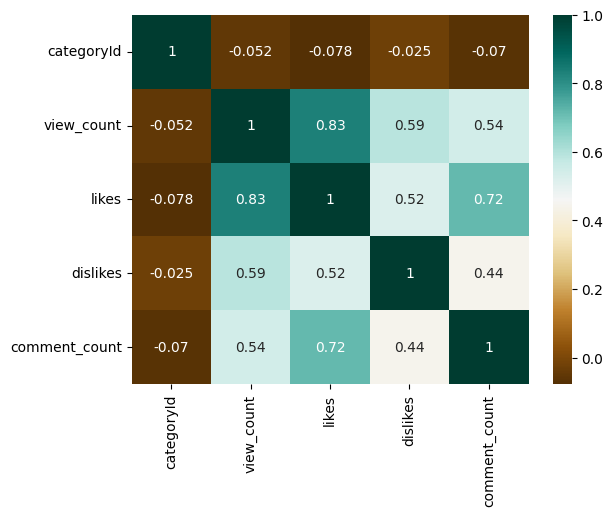

In [32]:
import seaborn as sns

sns.heatmap(current_df.corr(), cmap="BrBG", annot=True)

# Nedanstående meddelande för "numeric_only in DataFrame.corr" är på utgående.


#### Kommentarer för starkaste correlationsvärden

1. view_count och likes, 0,83
- *Det mest naturliga förhållandet. Om man seren populär video så är sannoliket stor att man "likar"*
1. comment_counts och likes, 0,72
- *Sannolikt att anta att det finns mer positiva kommentarer som också har fått ett "lik"*
1. view_count och dislikes, 0,59
- *Sannolikt videos med ett negativt innehåll för tittaren som har fått ett "dislikes"*
1. view_count och comment_counts, 0,54
- *Förhållande som visar att det är mer vanligt att man bara likar än skriver en kommentar(enligt översta relationen)*
1. likes och dislikes, 0,52
- *Allmänt kan sägas att dislikes är linjärt(?) relaterat till likes*
1. comment_counts och dislikes, 0,44
- *Stor sannolik negativa kommentarer p g a "dislikes". Relatioen är nästan hälften så vanlig jämfört med en likes*

### Diverse andra Grafer
#### Antagande och insikter från jointplot graf
Preliminära Antagande och insikter:
- Fler view_counts i kategori Entertainment, Sport och Gaming medan Music har toppar med mest tittare på enstaka videos.
- Antar att det är mer regelbunda tittare inom Sport och Gaming. Music kategorin är antagligen mer trend intensiv.
- Kategorin Entertainment kan vara en allmän kategori med mycket blandat innehåll där för de höga tittarsiffrorna.

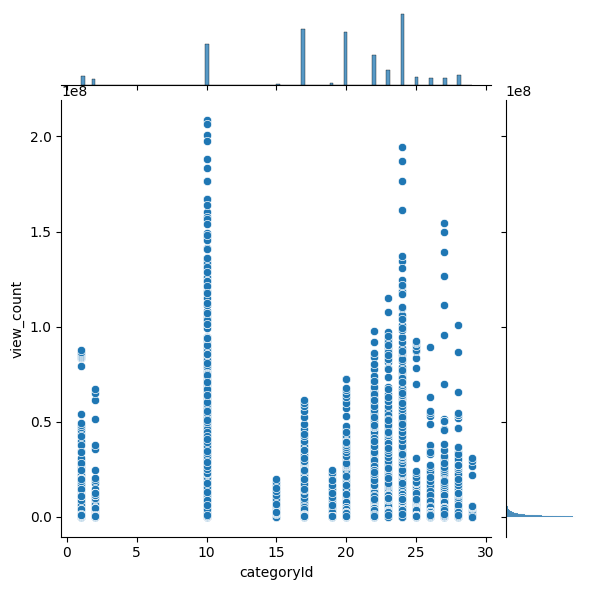

In [33]:
sns.jointplot(x=current_df.categoryId, y=current_df.view_count)

#### Kategorier på x-axeln
Skulle gärna vilja ha med kategorinamen i tabellen lyckades dock inte hitta en lösning för graftypen.

Avläs categoryId och se i id_to_category nedan.

Man kan bl a utläsa att Music, Entertainment, Sport, Gaming och Comedy är de kategorier som är mest populära t ex.

In [154]:
print(id_to_category)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


#### Detaljerade correlationsförhållanden mellan numeriska värden, enligt graftyp pairplot.
Antagande:
- Man kan se trendtoppar som får både likes och kommentarer
- Kategorin(categoryId) är med i grafen bara för att det är ett numeriskt värde

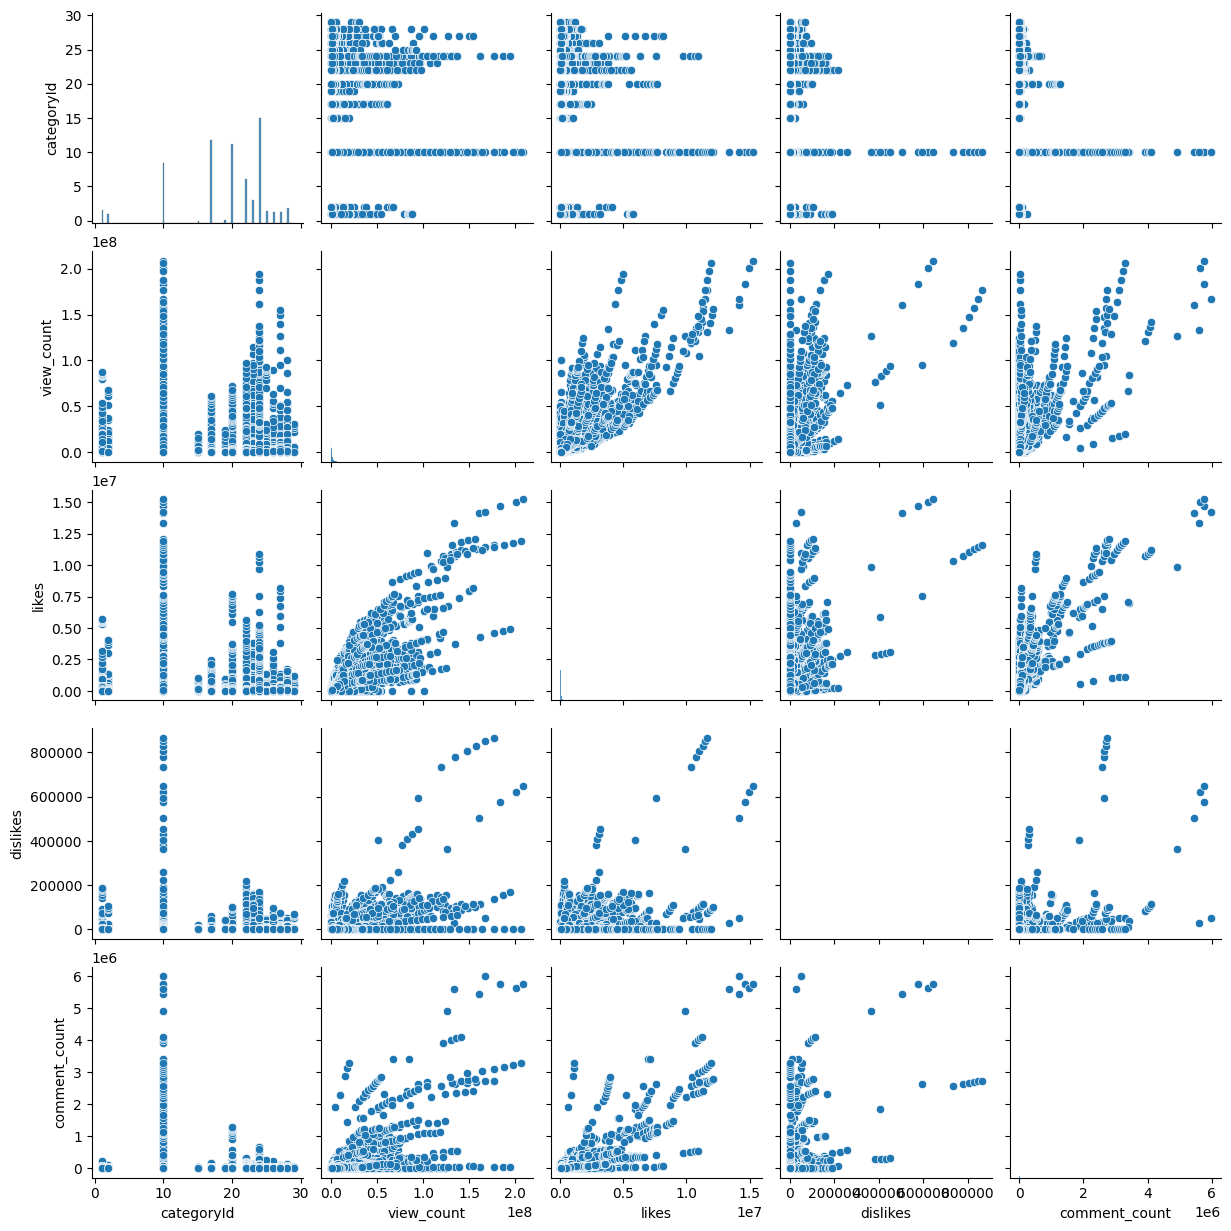

In [155]:
sns.pairplot(current_df.select_dtypes(['number']))

#### Detaljerade graf mellan kategori och antal tittare(view_count), enligt graftyp stripplot.
Antagande:
- Ytterligare parametern kommentarer(comment_count) så är kommentarerna överrepresenterade i Musik kategorin(Music)
- En del kommentarer inom Spel kategorin(Gaming).

<AxesSubplot: xlabel='categoryId', ylabel='view_count'>

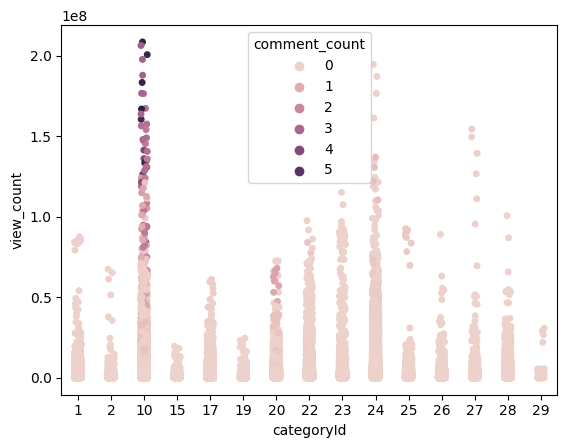

In [34]:
sns.stripplot(x=current_df.categoryId, y=current_df.view_count, hue=current_df.comment_count)

#### Scatterplot, en variantgraf på jointgraf(ovan)

<AxesSubplot: xlabel='categoryId', ylabel='view_count'>

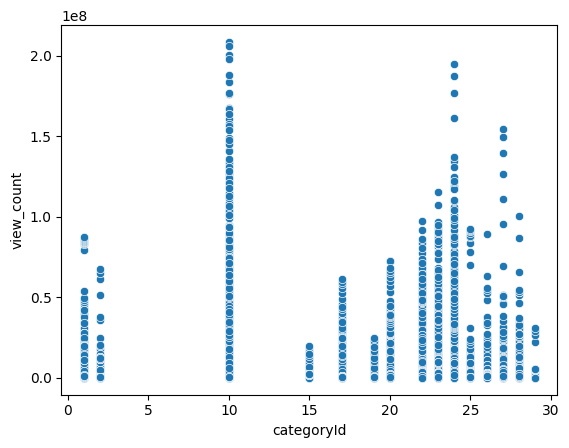

In [166]:
sns.scatterplot(x=current_df.categoryId, y=current_df.view_count)

---
---

### Pågående arbete, nedan(testzon)!!!
### Jag inser att det finns mer att göra och utforska.
### Jag fortsätter att arbeta vidare och ev. lägga till mer dataset för att komma fram till ett ingående och bättre resultat.
### Nyttig erfarenhet!

In [69]:
import pip, sys
print(sys.version)


3.10.6 (main, Aug 30 2022, 05:12:36) [Clang 13.1.6 (clang-1316.0.21.2.5)]


#### Test av loc och iloc kommando

In [83]:
# Address to specifik cell
print(df1.iloc[1,1])


TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS'


In [84]:
print(df1.iloc[0])


video_id                                                   J78aPJ3VyNs
title                I left youtube for a month and THIS is what ha...
publishedAt                                       2020-08-11T16:34:06Z
channelId                                     UCYzPXprvl5Y-Sf0g4vX-m6g
channelTitle                                             jacksepticeye
categoryId                                                          24
trending_date                                     2020-08-12T00:00:00Z
tags                 jacksepticeye|funny|funny meme|memes|jacksepti...
view_count                                                     2038853
likes                                                           353790
dislikes                                                          2628
comment_count                                                    40228
thumbnail_link          https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg
comments_disabled                                                False
rating

In [85]:
print(df1.iloc[0:4])


      video_id                                              title  \
0  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
1  9nidKH8cM38       TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS'   
2  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
3  kgUV1MaD_M8                     Nines - Clout (Official Video)   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
1  2020-08-11T20:00:45Z  UCFMbX7frWZfuWdjAML0babA  Eleanor Neale          27   
2  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
3  2020-08-10T18:30:28Z  UCvDkzrj8ZPlBqRd6fIxdhTw          Nines          24   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
1  2020-08-12T00:00:00Z  eleanor|neale|eleanor neale|eleanor neale true...   
2  2020-08-12T00:00

### Biblioteksproblem i Jupyter(M1)
Vid installation av bibliotek Pandas i Jupyter som körs i VS Code. Installera direkt i Jupyter med !pip om inte det fungerar så använd %pip för att åtgärda problemet. Annars installeras biblioteken under en annnan Python installation på din dator.

In [163]:
!source ../venv/bin/activate
!which python3
!python3 --version

/Users/per/Github/venv/bin/python3
Python 3.10.6


In [162]:
%pip list 

Package           Version
----------------- -------
appnope           0.1.3
asttokens         2.2.1
backcall          0.2.0
comm              0.1.1
contourpy         1.0.6
cycler            0.11.0
debugpy           1.6.4
decorator         5.1.1
entrypoints       0.4
executing         1.2.0
fonttools         4.38.0
ipykernel         6.19.0
ipython           8.7.0
jedi              0.18.2
joblib            1.2.0
jupyter_client    7.4.8
jupyter_core      5.1.0
kiwisolver        1.4.4
matplotlib        3.6.2
matplotlib-inline 0.1.6
nest-asyncio      1.5.6
numpy             1.23.5
packaging         21.3
pandas            1.5.2
parso             0.8.3
pexpect           4.8.0
pickleshare       0.7.5
Pillow            9.3.0
pip               22.3.1
platformdirs      2.6.0
prompt-toolkit    3.0.36
psutil            5.9.4
ptyprocess        0.7.0
pure-eval         0.2.2
Pygments          2.13.0
pyparsing         3.0.9
python-dateutil   2.8.2
pytz              2022.6
pyzmq             24.0.1
sciki

In [51]:
# A reminder of a problem when installing libraries for working in Jupyter in VS Code. If not !pip is working try %pip(M1).
%pip install - -upgrade pip
%pip install numpy
%pip install pandas
%pip install Matplotlib



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
